<a href="https://colab.research.google.com/github/DarkoMedin/Simple-Neural-Network-via-TensorFlow/blob/main/Simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries for the project
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas  as pd

In [ ]:
#Load Fashion MNIST  and separate train and test partitions
(tr_I, tr_L), (testI, testL)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
#Define classes
Fclass = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#Shuffle the data
tr_I, tr_L=shuffle(tr_I, tr_L)
testI, testL=shuffle(testI, testL)

In [ ]:
len(tr_I)

60000

In [ ]:
len(testI)

10000

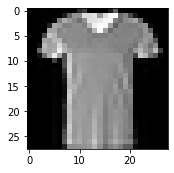

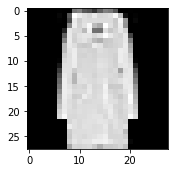

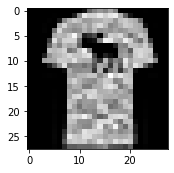

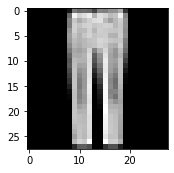

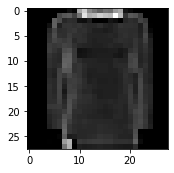

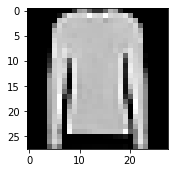

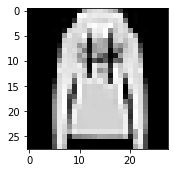

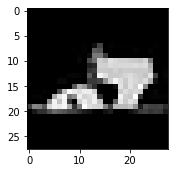

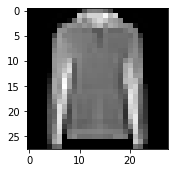

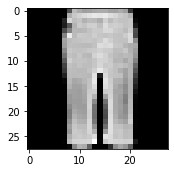

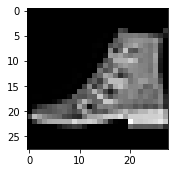

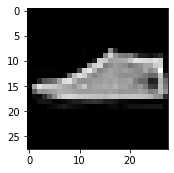

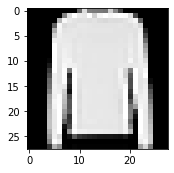

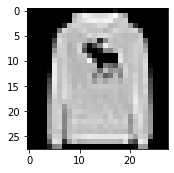

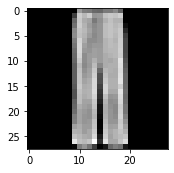

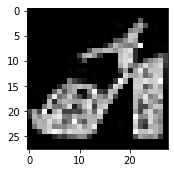

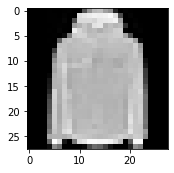

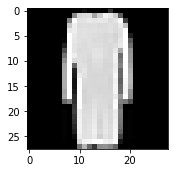

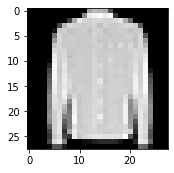

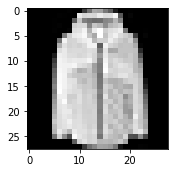

In [ ]:

for i in range (20):
  plt.figure(figsize=(15,15))
  plt.subplot(5,5,i+1)
  plt.imshow(tr_I[i+100], cmap=plt.get_cmap("gray"))
  plt.show()

In [ ]:
#Normalize the data to a scale from 0 to 1
tr_I, testI=tr_I/np.max(tr_I), testI/np.max(testI)

In [ ]:
#Reshape the data into 4 dimentions needed for Conv2D layers
tr_I=tr_I.reshape(-1,28,28,1)
testI=testI.reshape(-1,28,28,1)


In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(24, (2,2),padding='same', 
                           activation='relu', 
                           input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(28, (2,2),padding='same', 
                           activation='relu'),                        
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')])




In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 24)        120       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 28)        2716      
                                                                 
 flatten_2 (Flatten)         (None, 21952)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                219530    
                                                                 
Total params: 222,366
Trainable params: 222,366
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(
    optimizer=Adam(learning_rate=0.00015),
    loss='sparse_categorical_crossentropy' ,
    metrics=['accuracy']
)

In [ ]:

model.fit(x=tr_I, y=tr_L, epochs=20,
           validation_split=0.22, verbose=2, shuffle=True)

Epoch 1/20
1463/1463 - 44s - loss: 0.5401 - accuracy: 0.8161 - val_loss: 0.3995 - val_accuracy: 0.8589 - 44s/epoch - 30ms/step
Epoch 2/20
1463/1463 - 46s - loss: 0.3589 - accuracy: 0.8754 - val_loss: 0.3585 - val_accuracy: 0.8728 - 46s/epoch - 32ms/step
Epoch 3/20
1463/1463 - 45s - loss: 0.3229 - accuracy: 0.8861 - val_loss: 0.3413 - val_accuracy: 0.8780 - 45s/epoch - 31ms/step
Epoch 4/20
1463/1463 - 45s - loss: 0.3023 - accuracy: 0.8930 - val_loss: 0.3187 - val_accuracy: 0.8883 - 45s/epoch - 31ms/step
Epoch 5/20
1463/1463 - 45s - loss: 0.2859 - accuracy: 0.8988 - val_loss: 0.3187 - val_accuracy: 0.8884 - 45s/epoch - 30ms/step
Epoch 6/20
1463/1463 - 45s - loss: 0.2719 - accuracy: 0.9036 - val_loss: 0.3111 - val_accuracy: 0.8873 - 45s/epoch - 31ms/step
Epoch 7/20
1463/1463 - 45s - loss: 0.2600 - accuracy: 0.9083 - val_loss: 0.3057 - val_accuracy: 0.8911 - 45s/epoch - 31ms/step
Epoch 8/20
1463/1463 - 47s - loss: 0.2498 - accuracy: 0.9115 - val_loss: 0.3076 - val_accuracy: 0.8902 - 47s/ep

In [ ]:

model.evaluate(testI, testL)

313/313 [==============================] - 3s 11ms/step - loss: 0.3122 - accuracy: 0.8948


[0.312221884727478, 0.8948000073432922]